# Assignment 1.a
# Manne Bhanu Nithin Yadav
# U48976457

## Pre Processing the data

### Aim :

Now-a-days, default payments for each bill payments is increasing at an exponential rate. So, the aim of our analysis is to develop a model which helps in predicting the default payments and non-default payments according to the attributes provided.
We will be performing different type of models and conclude which one can fit the data accurately

### Data description

The data consists of total of 30000 instances and 24 attributes. The target variable is 'default payment next month'. Here we will be considering all the attributes in order to predict the default payments.

### Importing required libraries 

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.datasets import make_classification
from collections import Counter
np.random.seed(1)

### Below code is to get the path of the data

In [4]:
import os
print(os.getcwd())

C:\Users\Nithin Yadav\Downloads


### Importing the CSV file

In [8]:
df = pd.read_csv("default-of-credit-card-clients.csv")
df.columns = df.iloc[0] ## to delete the first row as the main heading were in the 2nd row
df = df.drop(0)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
df.shape

(30000, 25)

In [10]:
df.columns= df.columns.str.upper()
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT PAYMENT NEXT MONTH'],
      dtype='object', name=0)

### To get details of number of columns and rows, type of entries in each attribute

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

### we will be getting the descriptive analysis of the data 

In [12]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT PAYMENT NEXT MONTH
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,2075,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### This is used to check whether the data has any null/missing values 

In [13]:
df.isna().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
DEFAULT PAYMENT NEXT MONTH    0
dtype: int64

*** as there are no missing values in the data we are good to go with the futher cleaning process ***

In [14]:
df.isnull().any()

0
ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
DEFAULT PAYMENT NEXT MONTH    False
dtype: bool

### Checking whether we have any data imbalance in the target variable 

In [15]:
df['DEFAULT PAYMENT NEXT MONTH'].value_counts()

0    23364
1     6636
Name: DEFAULT PAYMENT NEXT MONTH, dtype: int64

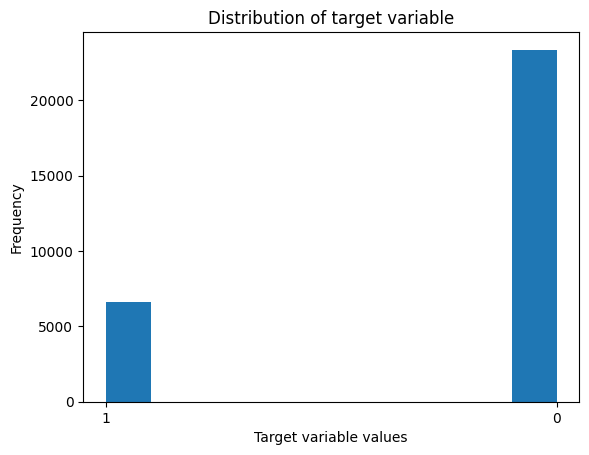

In [16]:
plt.hist(df['DEFAULT PAYMENT NEXT MONTH'], bins=10)
plt.title('Distribution of target variable')
plt.xlabel('Target variable values')
plt.ylabel('Frequency')
plt.show()

*** there is a significance difference in the binary values of the target variables so data imbalancing need to be performed***

## Splitting the data into test and train sets

In [17]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=1)

In [18]:
target = 'DEFAULT PAYMENT NEXT MONTH'
predictor = list(df.columns)
predictor.remove(target)

columns = list(df.columns)
columns.remove('DEFAULT PAYMENT NEXT MONTH')

y = df['DEFAULT PAYMENT NEXT MONTH']
X = df[columns]

In [19]:
train_X = train_df.drop(columns=['DEFAULT PAYMENT NEXT MONTH'])
train_y = train_df['DEFAULT PAYMENT NEXT MONTH']
test_X = test_df.drop(columns=['DEFAULT PAYMENT NEXT MONTH'])
test_y = test_df['DEFAULT PAYMENT NEXT MONTH']

### Saving the preprocessed data

In [20]:
train_df.to_csv('default_train_df.csv', index=False)
train_X.to_csv('default_train_X.csv', index=False)
train_y.to_csv('default_train_y.csv', index=False)
test_df.to_csv('default_test_df.csv', index=False)
test_X.to_csv('default_test_X.csv', index=False)
test_y.to_csv('default_test_y.csv', index=False)

#### The splitted data is saved and we will be using this data for further model fitting